In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
data = pd.read_csv('/content/open_meteo.csv')
data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)
# Display the first few rows of the dataset to understand its structure
data.head()

Unnamed: 0       time  weathercode  temperature_2m_max  temperature_2m_min  \
0           0 2010-01-01            0                26.0                14.8   
1           1 2010-01-02            2                25.3                15.6   
2           2 2010-01-03            0                25.0                14.3   
3           3 2010-01-04            0                25.6                15.0   
4           4 2010-01-05            0                25.4                16.3   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0                 20.9                      24.0                      13.4   
1                 20.5                      21.8                      13.7   
2                 19.9                      22.8                      14.2   
3                 20.4                      23.9                      13.7   
4                 20.7                      24.5                      16.8   

   apparent_temperature_mean           sunrise  ... precipitation_hours  \
0                       18.6  2010-01-01T02:16  ...                   0   
1                       18.1  2010-01-02T02:17  ...                   0   
2                       18.9  2010-01-03T02:17  ...                   0   
3                       19.4  2010-01-04T02:17  ...                   0   
4                       20.7  2010-01-05T02:17  ...                   0   

   windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  \
0               18.3               25.6                          54   
1               24.6               35.3                          64   
2               16.6               28.1                         312   
3               14.0               22.7                         353   
4               19.3               29.2                         270   

   et0_fao_evapotranspiration   latitude  longitude  elevation   country  \
0                        4.38  24.900002       67.0          8  Pakistan   
1                        3.84  24.900002       67.0          8  Pakistan   
2                        3.69  24.900002       67.0          8  Pakistan   
3                        3.63  24.900002       67.0          8  Pakistan   
4                        3.55  24.900002       67.0          8  Pakistan   

      city  
0  Karachi  
1  Karachi  
2  Karachi  
3  Karachi  
4  Karachi  

[5 rows x 25 columns]

In [14]:
# Check for duplicates
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print('Duplicate rows found:')
    print(duplicates)
else:
    print('No duplicate rows found\n')

# Check for missing Values & Data types
data.info()

No duplicate rows found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34762 entries, 0 to 34761
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  34762 non-null  int64         
 1   time                        34762 non-null  datetime64[ns]
 2   weathercode                 34762 non-null  int64         
 3   temperature_2m_max          34762 non-null  float64       
 4   temperature_2m_min          34762 non-null  float64       
 5   temperature_2m_mean         34762 non-null  float64       
 6   apparent_temperature_max    34762 non-null  float64       
 7   apparent_temperature_min    34762 non-null  float64       
 8   apparent_temperature_mean   34762 non-null  float64       
 9   sunrise                     34762 non-null  object        
 10  sunset                      34762 non-null  object        
 11  shortwave_radiation_sum     3

In [41]:
def degrees_to_cardinal(d):
    """
    Convert wind direction in degrees to cardinal direction.
    """
    dirs = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']
    ix = int((d + 22.5) / 45.0)
    return dirs[ix]


In [42]:
# Applying the function to the 'winddirection_10m_dominant' column
data['cardinal_wind_direction'] = data['winddirection_10m_dominant'].apply(degrees_to_cardinal)

# Displaying the first few rows of the dataset with the new column
data[['city', 'winddirection_10m_dominant', 'cardinal_wind_direction']].head()


city  winddirection_10m_dominant cardinal_wind_direction
0  Karachi                          54                      NE
1  Karachi                          64                      NE
2  Karachi                         312                      NW
3  Karachi                         353                       N
4  Karachi                         270                       W

In [43]:
# Extract wind-related columns and get summary statistics
wind_data = data[['windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant']]
wind_summary = wind_data.describe()

wind_summary


windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant
count       34762.000000       34762.000000                34762.000000
mean           18.603832          34.039563                  224.866089
std             6.353607           9.502845                   98.786400
min             4.000000          13.700000                    0.000000
25%            14.000000          27.000000                  193.000000
50%            17.300000          32.800000                  251.000000
75%            22.000000          39.200000                  297.000000
max            78.700000         123.500000                  360.000000

In [44]:
# Compute the correlation of wind-related columns with other columns
correlation_matrix = data.corr()[['windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant']]

# Sort by absolute value for windspeed_10m_max to get the most significant correlations on top
correlation_matrix = correlation_matrix.reindex(correlation_matrix['windspeed_10m_max'].abs().sort_values(ascending=False).index)

correlation_matrix


<ipython-input-44-8bf7e20b9b50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()[['windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant']]


windspeed_10m_max  windgusts_10m_max  \
windspeed_10m_max                    1.000000           0.869726   
windgusts_10m_max                    0.869726           1.000000   
longitude                           -0.437186          -0.197459   
latitude                             0.405043           0.140122   
et0_fao_evapotranspiration           0.292045           0.107409   
temperature_2m_min                   0.244884           0.311227   
temperature_2m_mean                  0.208472           0.204802   
elevation                            0.207926           0.117571   
apparent_temperature_max            -0.129664          -0.063489   
temperature_2m_max                   0.119650           0.051895   
apparent_temperature_min             0.104405           0.204036   
winddirection_10m_dominant           0.103822           0.147206   
precipitation_sum                    0.095223           0.274753   
rain_sum                             0.095223           0.274753   
shortwave_radiation_sum              0.076481          -0.044808   
weathercode                         -0.039648           0.163460   
precipitation_hours                  0.038314           0.272219   
Unnamed: 0                           0.008174          -0.041737   
apparent_temperature_mean           -0.005024           0.091390   
snowfall_sum                              NaN                NaN   

                            winddirection_10m_dominant  
windspeed_10m_max                             0.103822  
windgusts_10m_max                             0.147206  
longitude                                     0.123613  
latitude                                     -0.164549  
et0_fao_evapotranspiration                   -0.029858  
temperature_2m_min                            0.276874  
temperature_2m_mean                           0.212013  
elevation                                    -0.060861  
apparent_temperature_max                      0.205724  
temperature_2m_max                            0.048061  
apparent_temperature_min                      0.334189  
winddirection_10m_dominant                    1.000000  
precipitation_sum                             0.061396  
rain_sum                                      0.061396  
shortwave_radiation_sum                       0.107222  
weathercode                                   0.159036  
precipitation_hours                           0.127854  
Unnamed: 0                                   -0.128601  
apparent_temperature_mean                     0.300309  
snowfall_sum                                       NaN

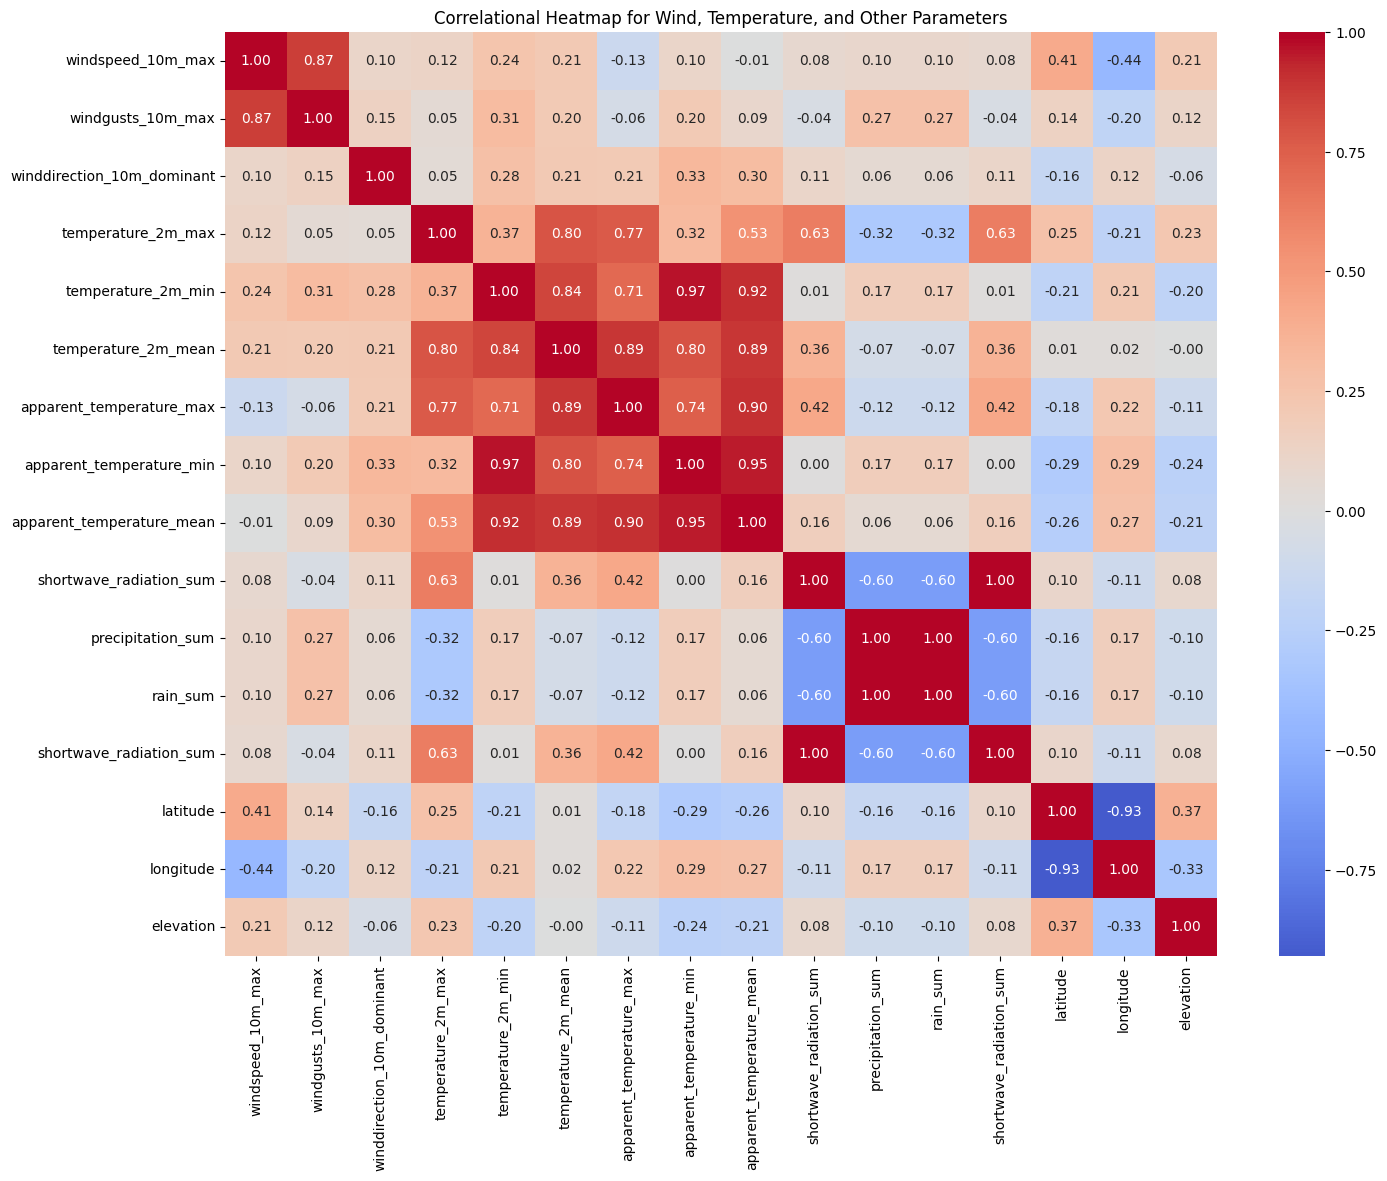

In [45]:
# Regenerating the correlation matrix for all mentioned parameters
correlation_matrix_full = data[['windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant',
                                'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
                                'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean',
                                'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum', 'shortwave_radiation_sum',
                                'latitude', 'longitude', 'elevation']].corr()

# Plotting the heatmap without any mask
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.xticks(rotation=90)
plt.title('Correlational Heatmap for Wind, Temperature, and Other Parameters')
plt.show()



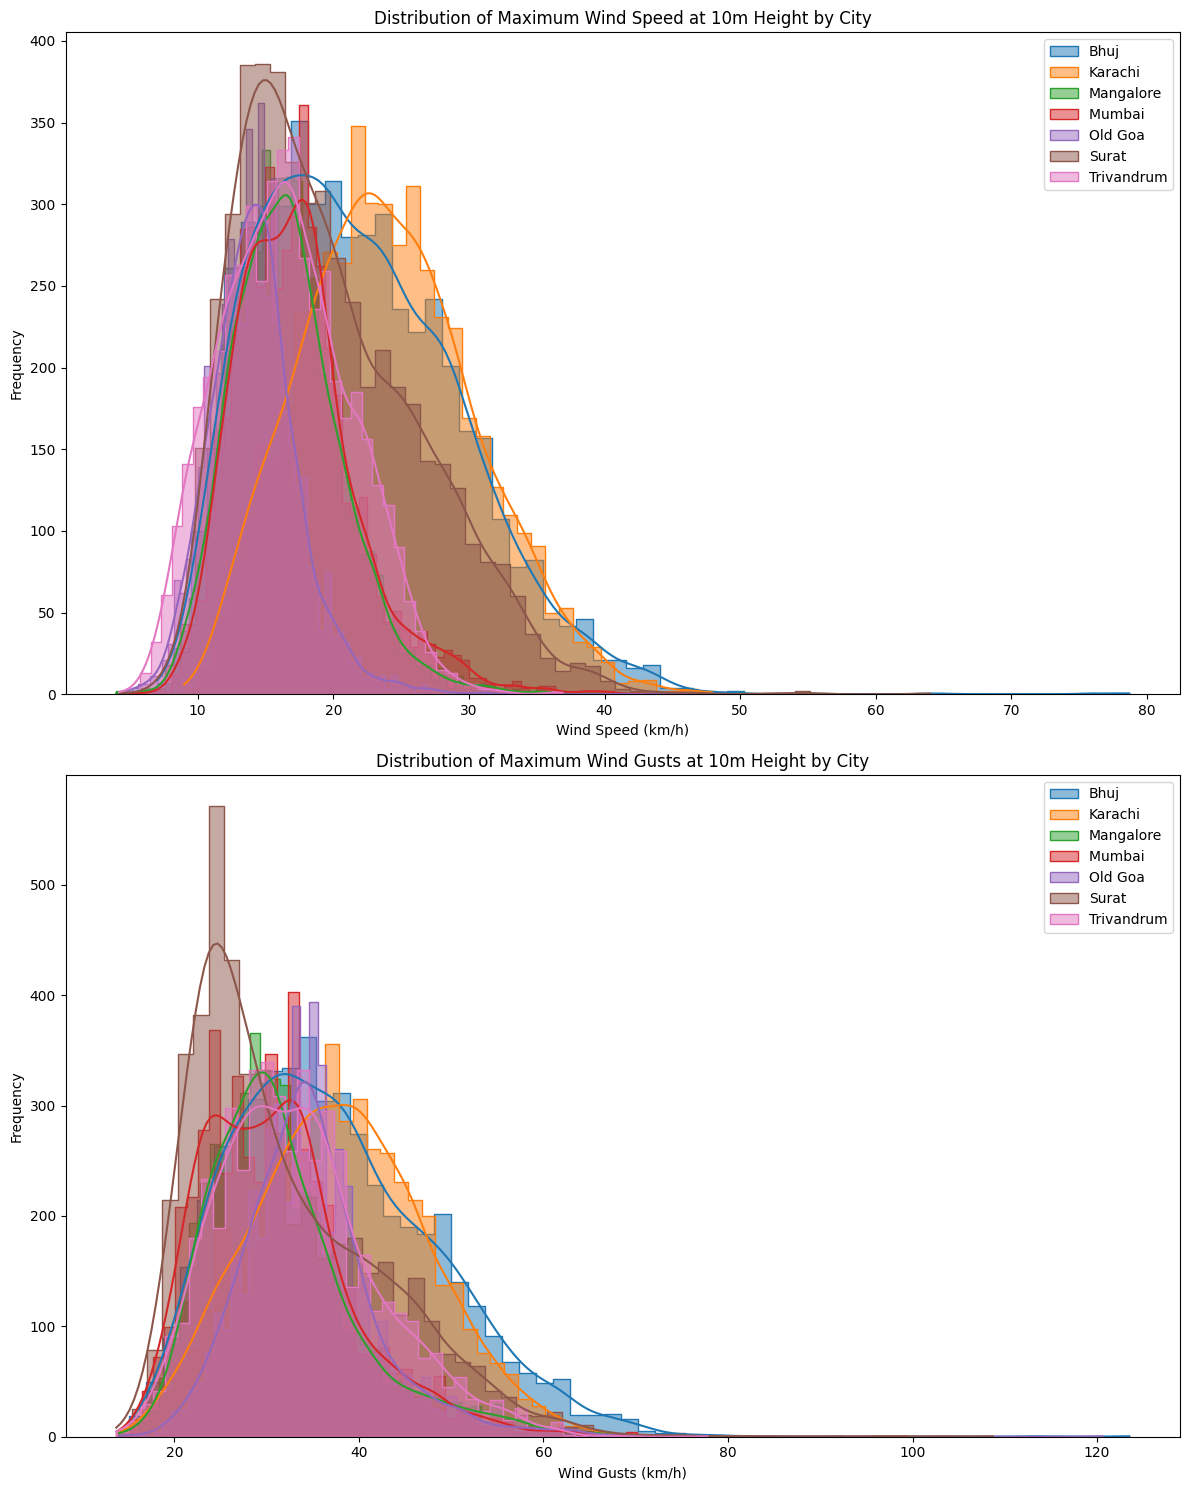

In [40]:
# Grouping by city and then plotting the histograms for each wind parameter

# Set up the figure
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))

# For each city, plot the distributions
for city, group_data in data.groupby('city'):
    # Windspeed at 10m height (max)
    sns.histplot(data=group_data, x='windspeed_10m_max', kde=True, ax=ax[0], label=city, element='step')
    ax[0].set_title('Distribution of Maximum Wind Speed at 10m Height by City')
    ax[0].set_xlabel('Wind Speed (km/h)')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()

    # Wind gusts at 10m height (max)
    sns.histplot(data=group_data, x='windgusts_10m_max', kde=True, ax=ax[1], label=city, element='step')
    ax[1].set_title('Distribution of Maximum Wind Gusts at 10m Height by City')
    ax[1].set_xlabel('Wind Gusts (km/h)')
    ax[1].set_ylabel('Frequency')
    ax[1].legend()


# Adjust the layout
plt.tight_layout()
plt.show()


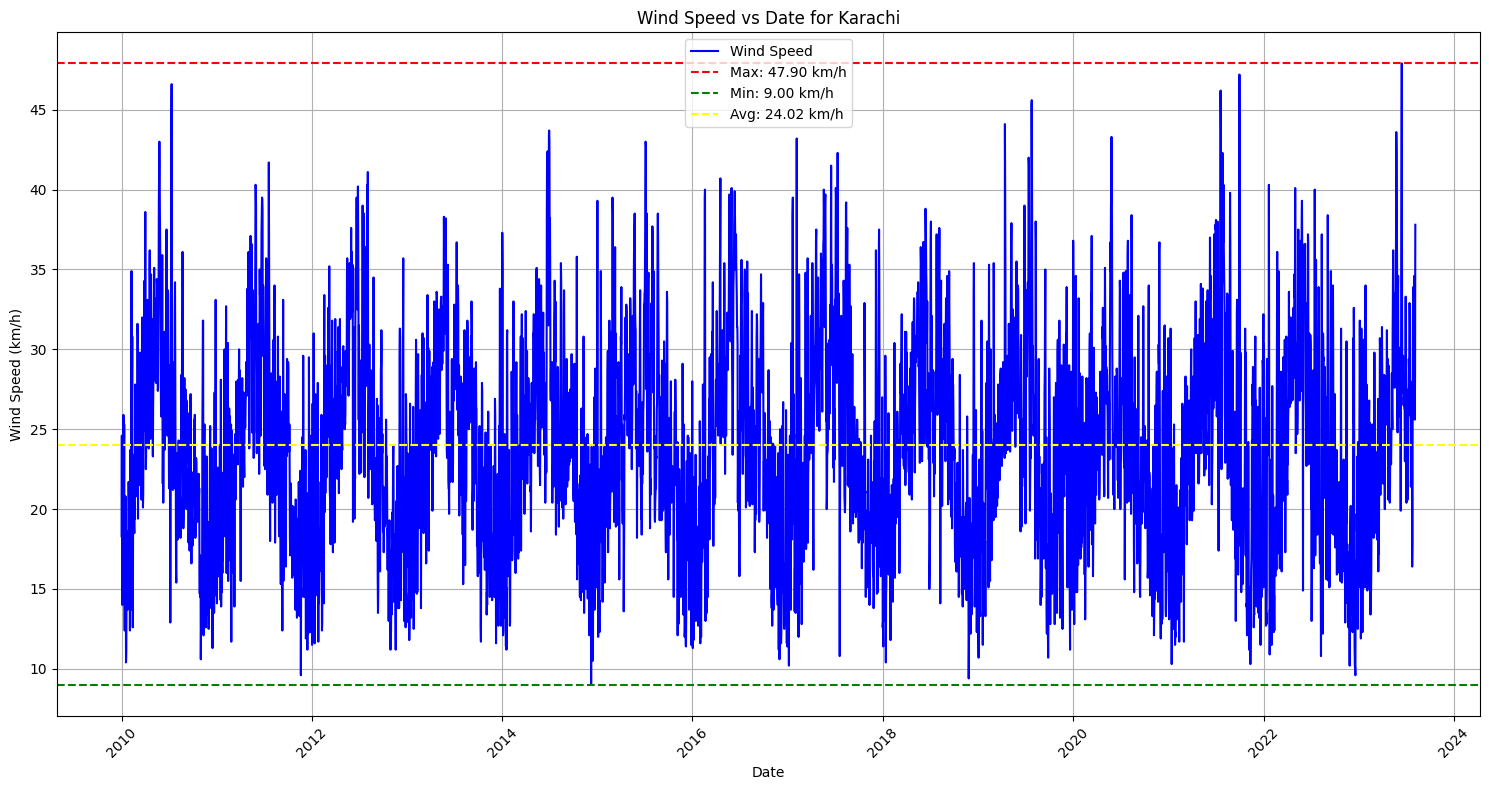

In [28]:
# Filtering data for Karachi
karachi_data = data[data['city'] == 'Karachi']

# Set up the plot
plt.figure(figsize=(15, 8))

# Plotting the wind speed vs date for Karachi
plt.plot(karachi_data['time'], karachi_data['windspeed_10m_max'], label='Wind Speed', color='blue')

# Marking the maximum, minimum, and average wind speed
max_wind_speed = karachi_data['windspeed_10m_max'].max()
min_wind_speed = karachi_data['windspeed_10m_max'].min()
avg_wind_speed = karachi_data['windspeed_10m_max'].mean()

plt.axhline(max_wind_speed, color='red', linestyle='--', label=f'Max: {max_wind_speed:.2f} km/h')
plt.axhline(min_wind_speed, color='green', linestyle='--', label=f'Min: {min_wind_speed:.2f} km/h')
plt.axhline(avg_wind_speed, color='yellow', linestyle='--', label=f'Avg: {avg_wind_speed:.2f} km/h')

# Title and labels
plt.title('Wind Speed vs Date for Karachi')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()


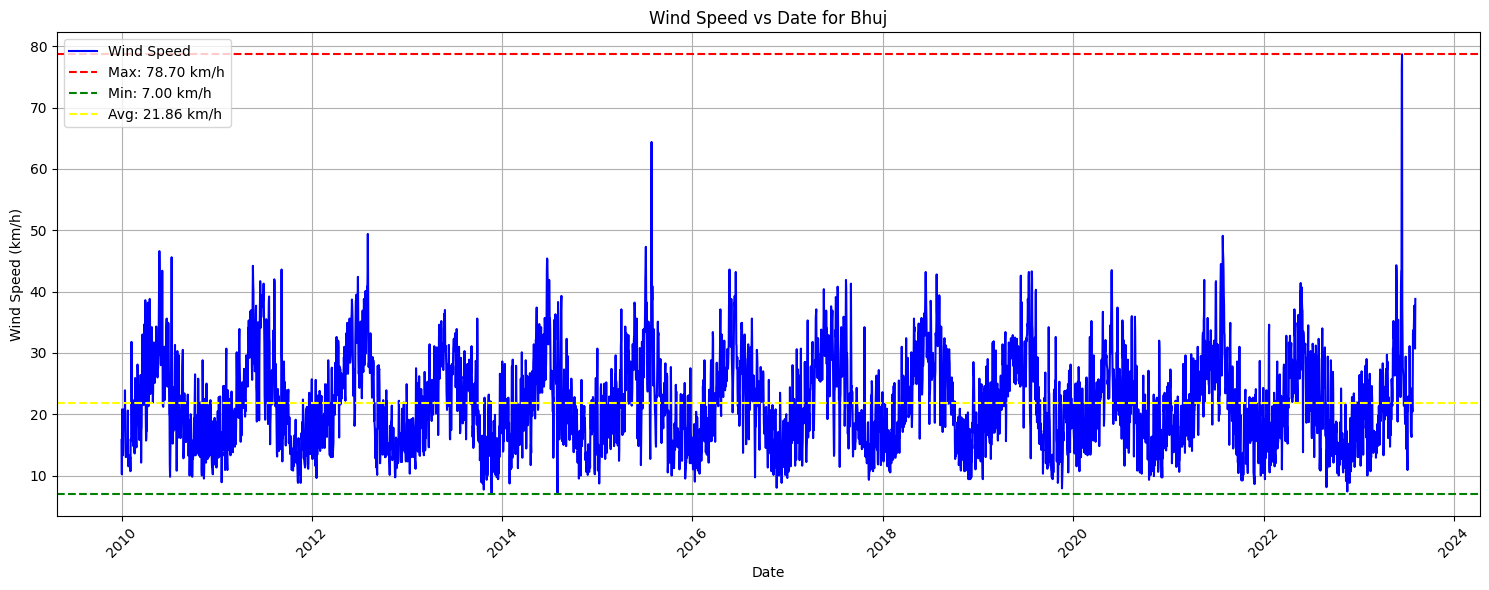

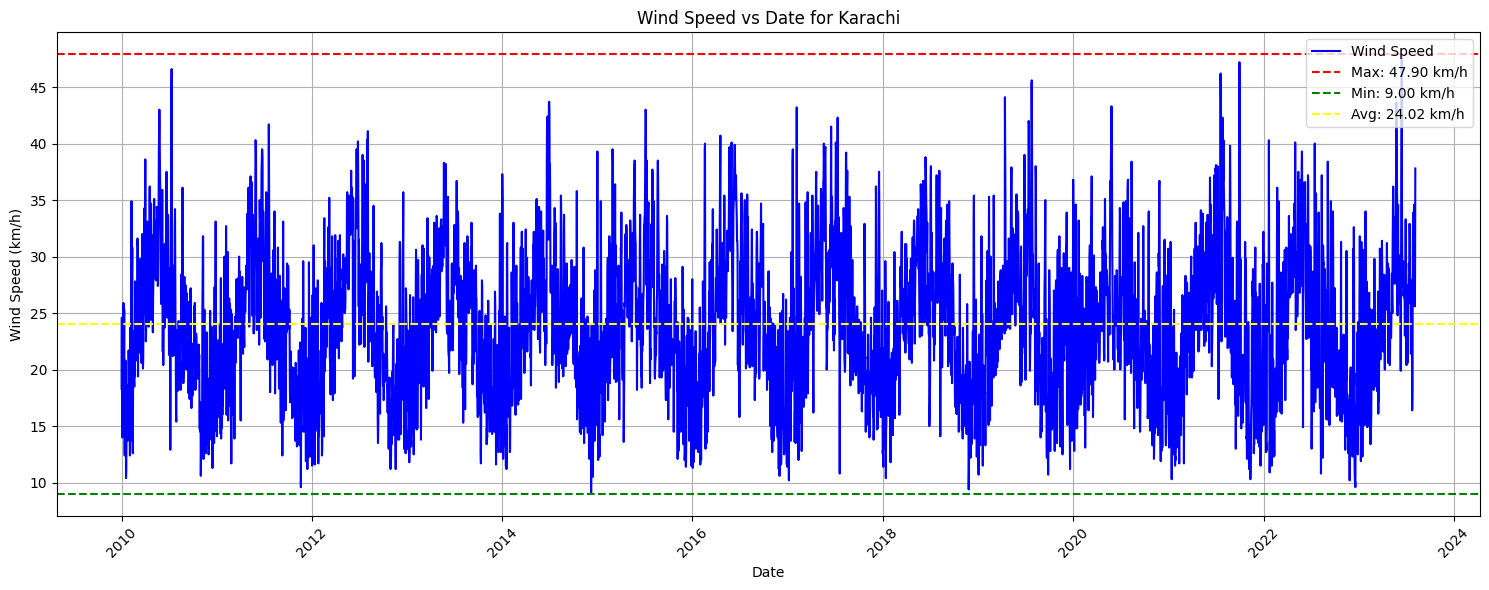

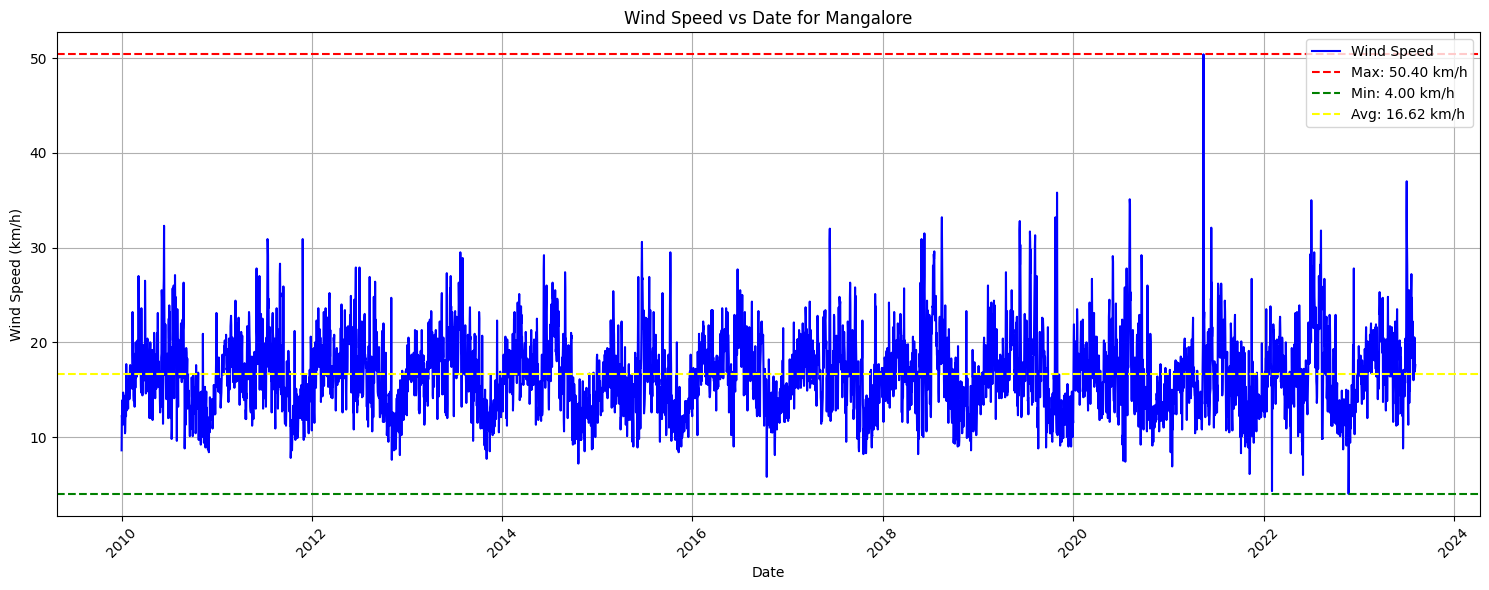

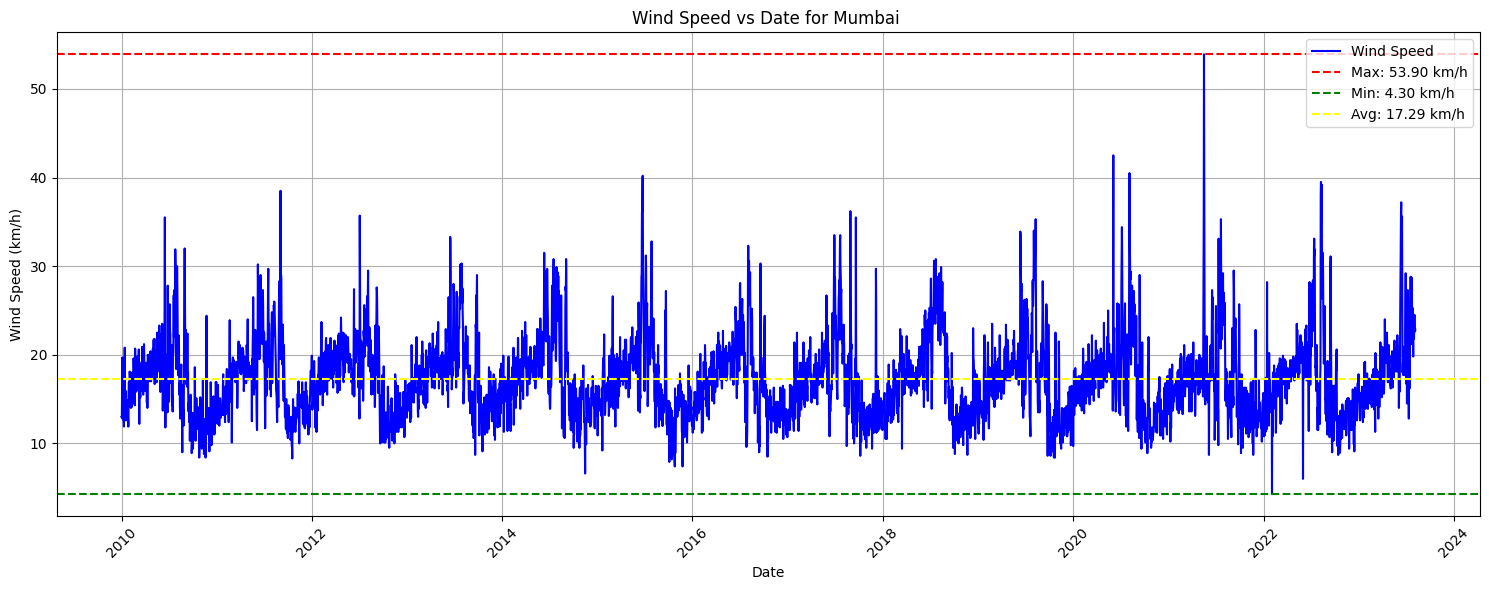

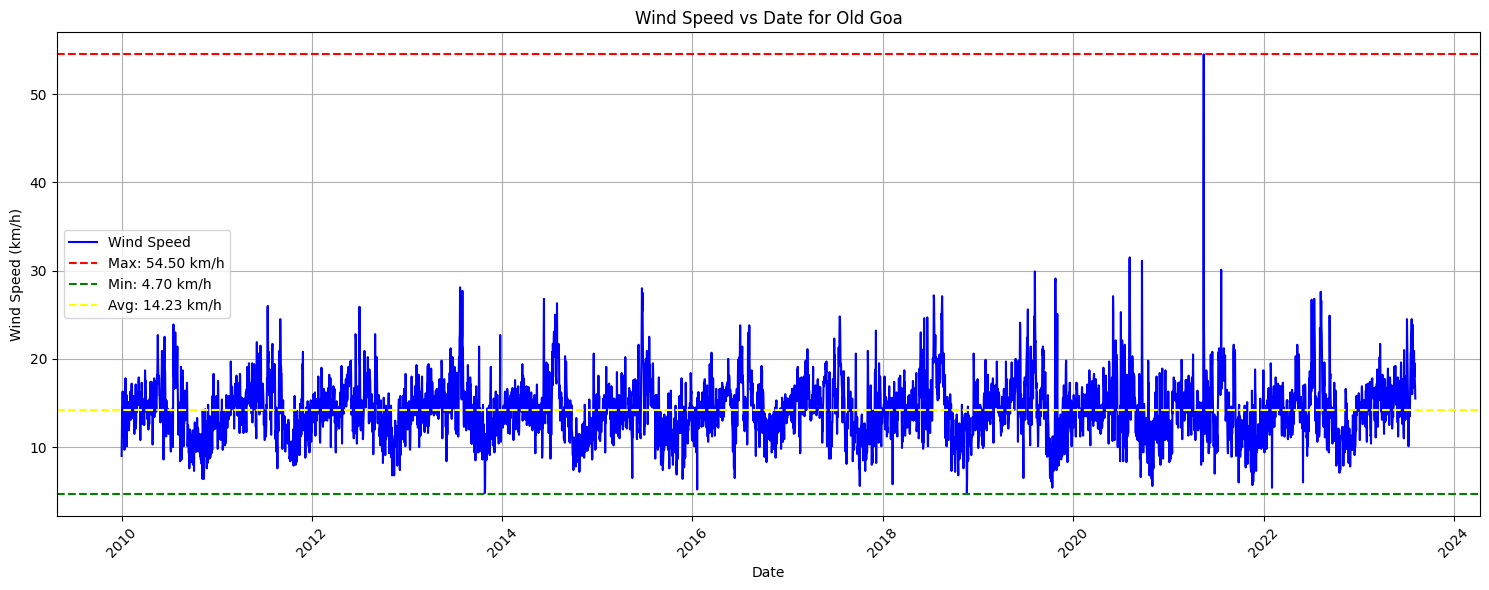

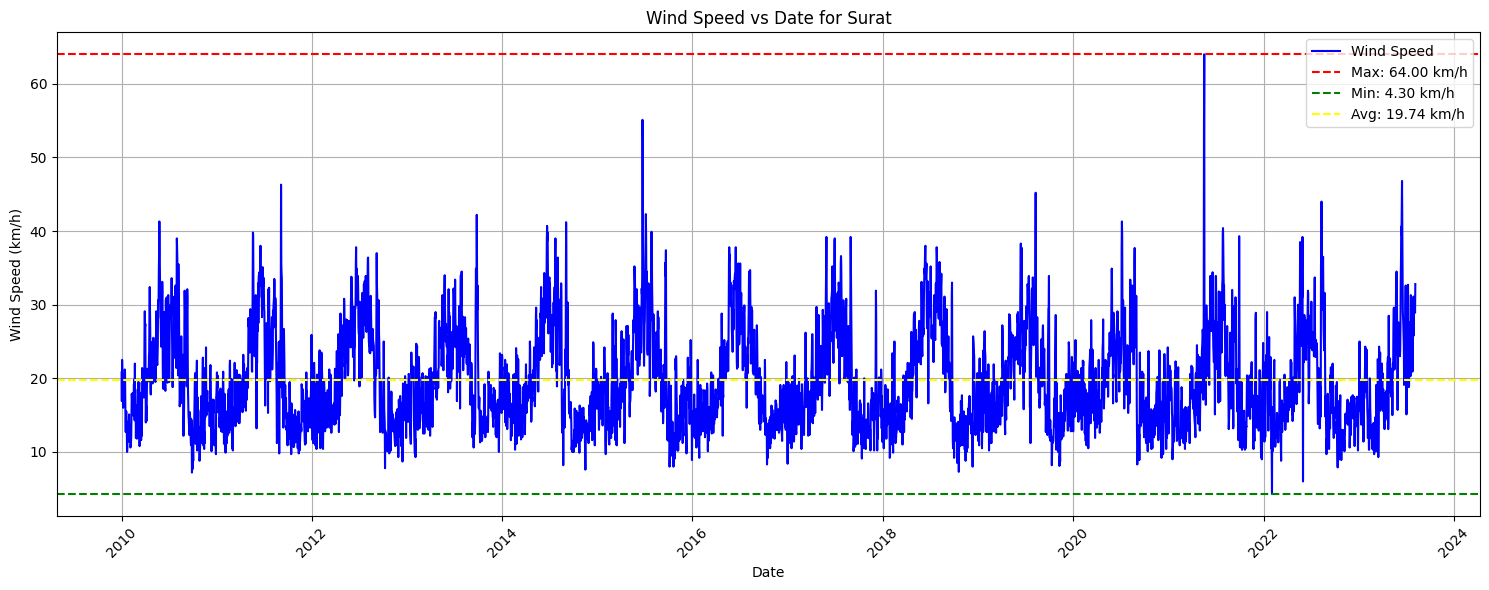

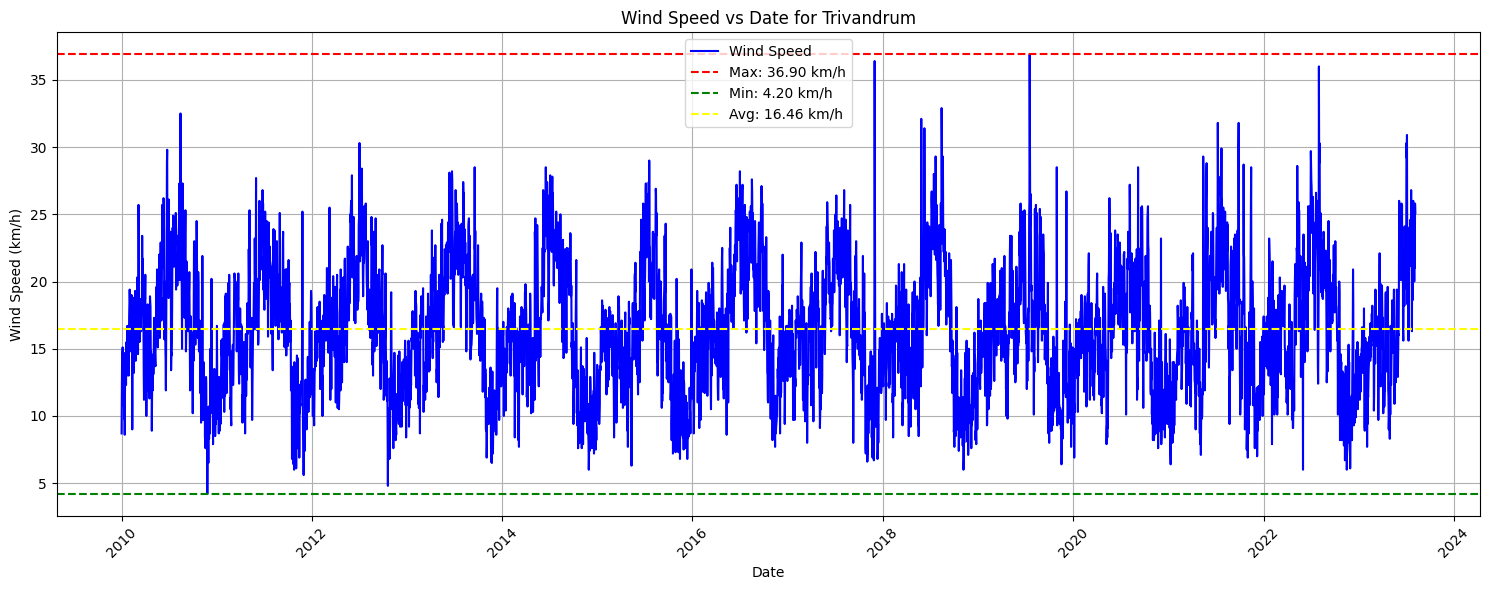

In [30]:
# Plotting the wind speed vs date for each city in separate graphs
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(15, 6))

    # Plotting the wind speed
    plt.plot(group_data['time'], group_data['windspeed_10m_max'], label='Wind Speed', color='blue')

    # Marking the maximum, minimum, and average wind speed
    max_wind_speed = group_data['windspeed_10m_max'].max()
    min_wind_speed = group_data['windspeed_10m_max'].min()
    avg_wind_speed = group_data['windspeed_10m_max'].mean()

    plt.axhline(max_wind_speed, color='red', linestyle='--', label=f'Max: {max_wind_speed:.2f} km/h')
    plt.axhline(min_wind_speed, color='green', linestyle='--', label=f'Min: {min_wind_speed:.2f} km/h')
    plt.axhline(avg_wind_speed, color='yellow', linestyle='--', label=f'Avg: {avg_wind_speed:.2f} km/h')

    # Title and labels
    plt.title(f'Wind Speed vs Date for {city}')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (km/h)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)

    plt.show()


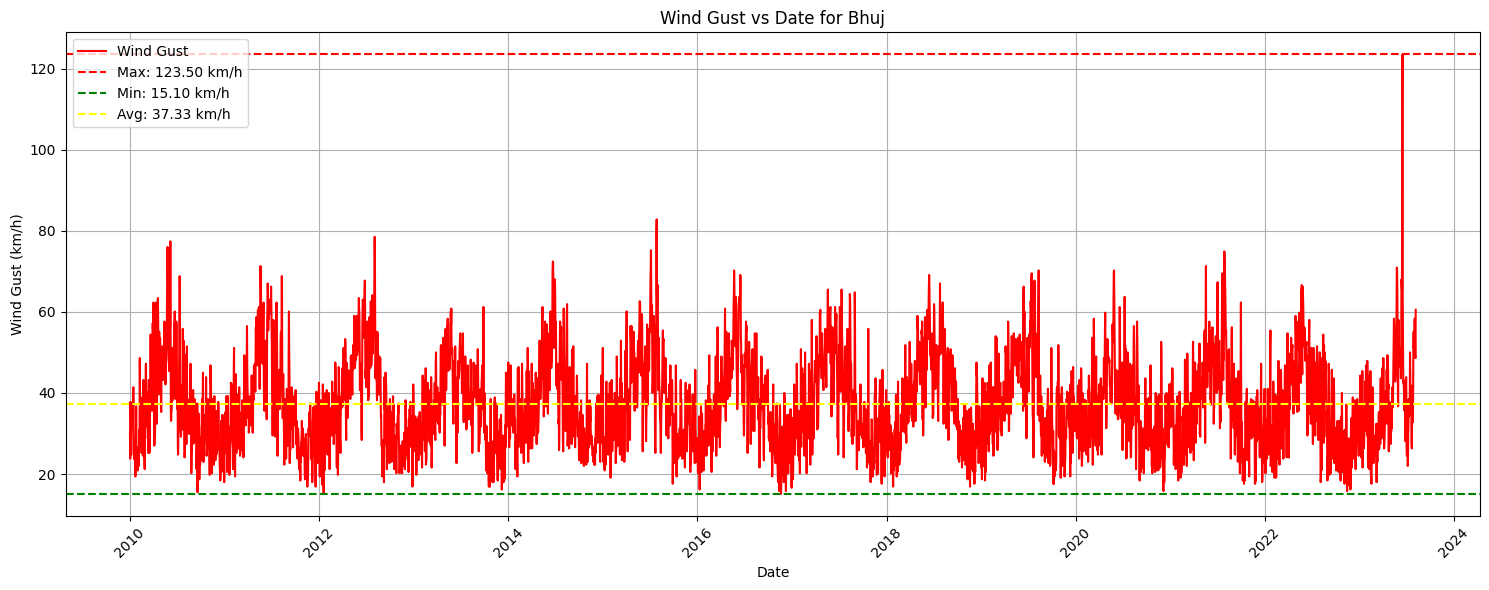

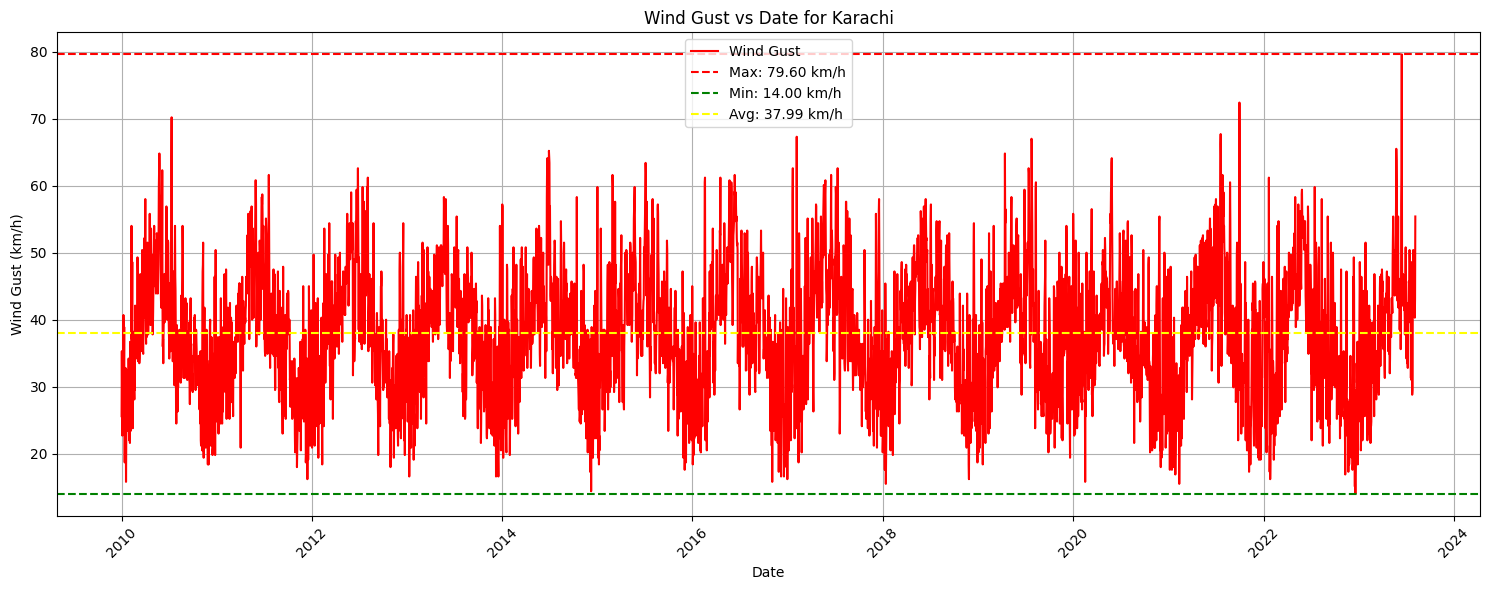

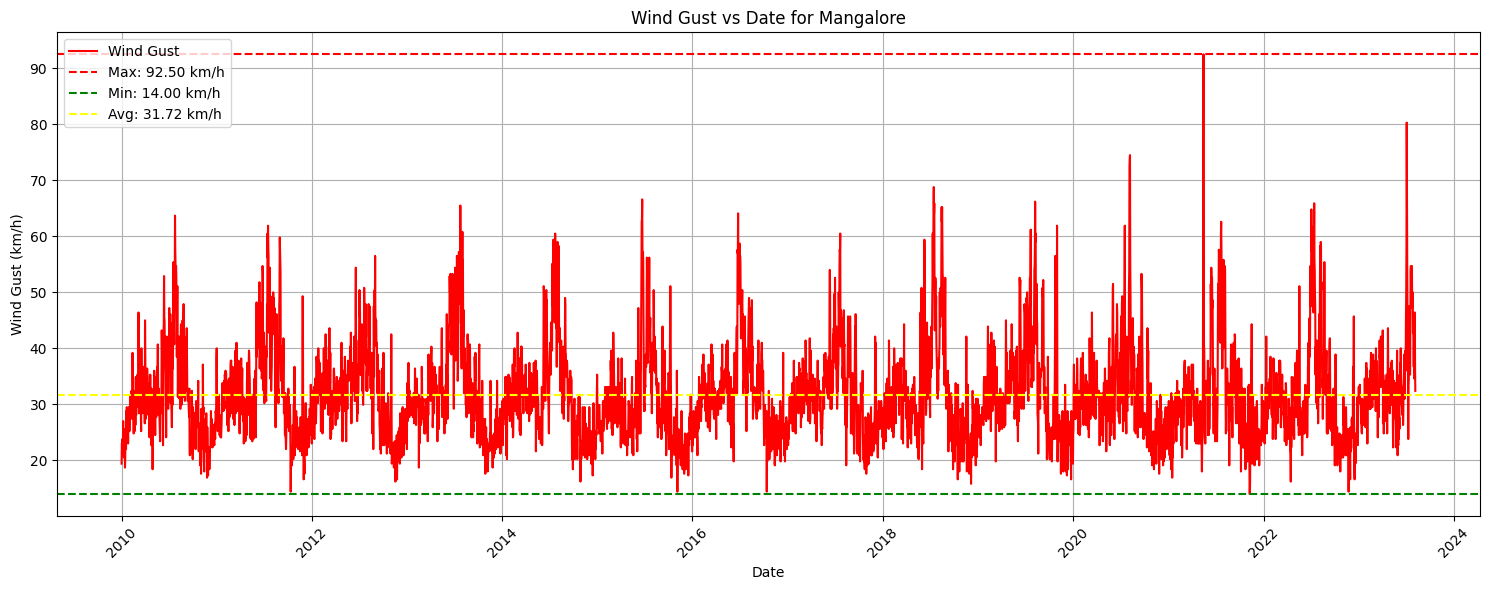

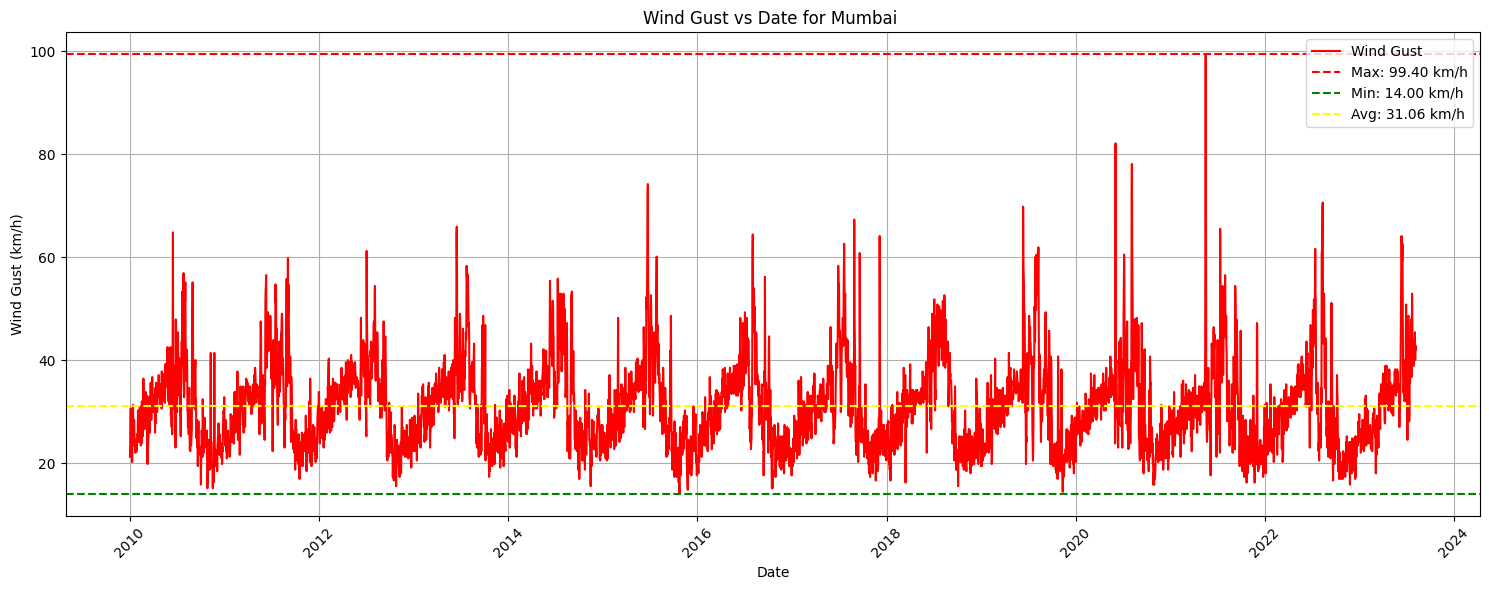

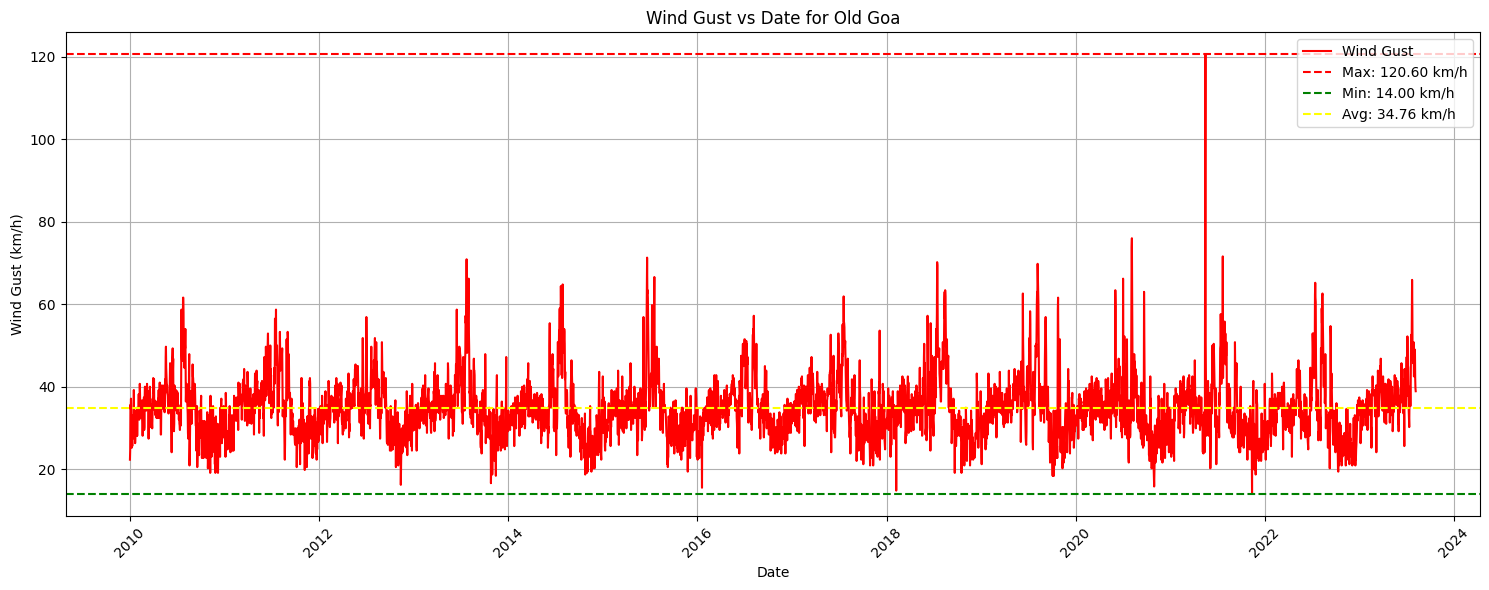

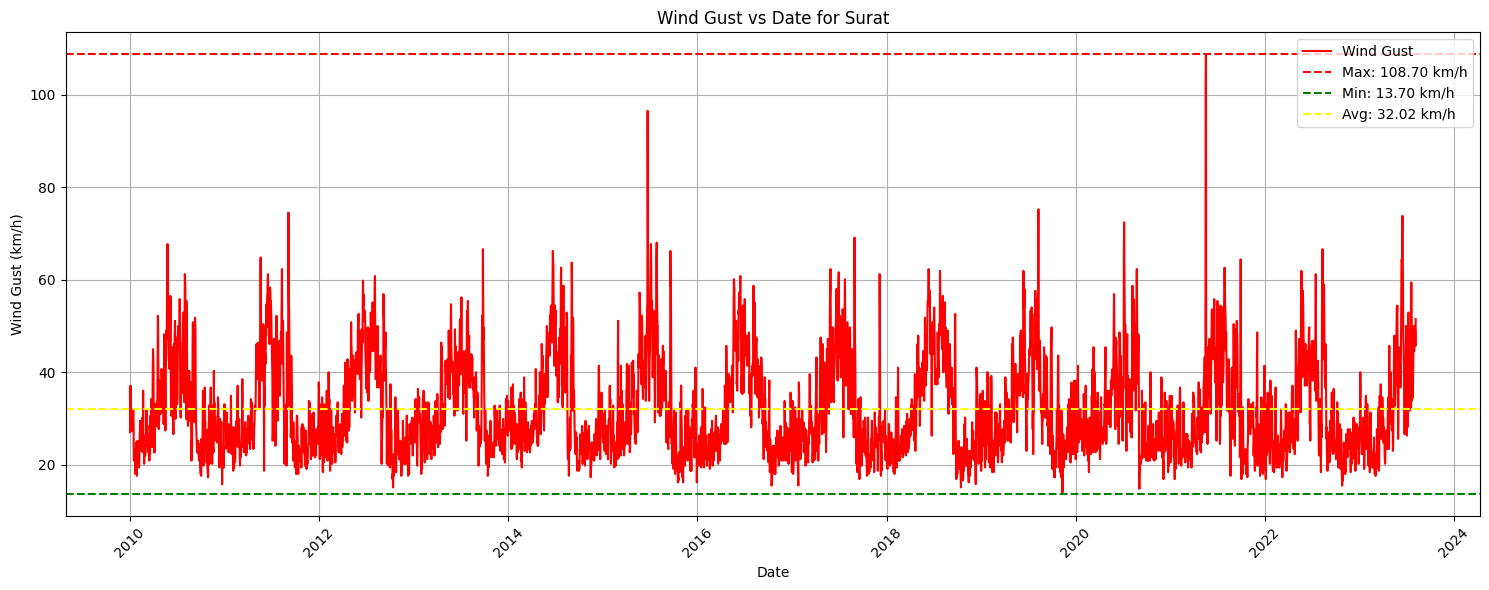

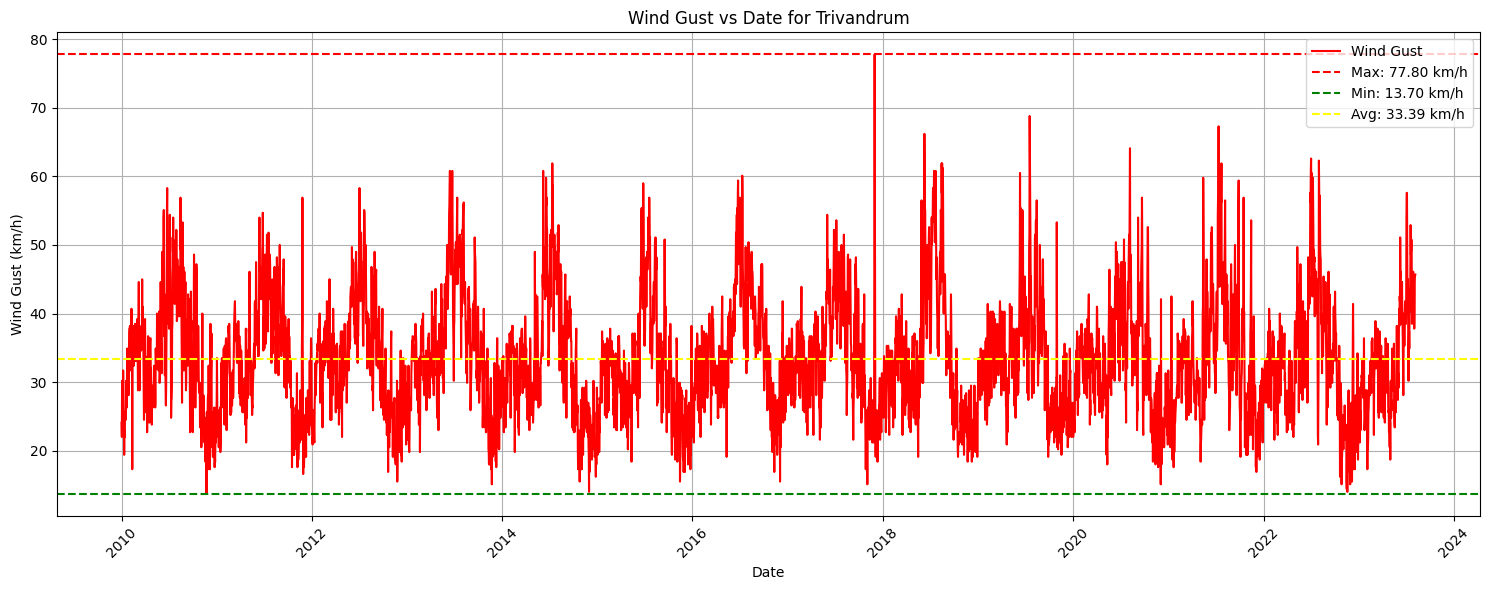

In [33]:
# Plotting the wind speed vs date for each city in separate graphs
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(15, 6))

    # Plotting the wind speed
    plt.plot(group_data['time'], group_data['windgusts_10m_max'], label='Wind Gust', color='red')

    # Marking the maximum, minimum, and average wind speed
    max_wind_gust = group_data['windgusts_10m_max'].max()
    min_wind_gust = group_data['windgusts_10m_max'].min()
    avg_wind_gust = group_data['windgusts_10m_max'].mean()

    plt.axhline(max_wind_gust, color='red', linestyle='--', label=f'Max: {max_wind_gust:.2f} km/h')
    plt.axhline(min_wind_gust, color='green', linestyle='--', label=f'Min: {min_wind_gust:.2f} km/h')
    plt.axhline(avg_wind_gust, color='yellow', linestyle='--', label=f'Avg: {avg_wind_gust:.2f} km/h')

    # Title and labels
    plt.title(f'Wind Gust vs Date for {city}')
    plt.xlabel('Date')
    plt.ylabel('Wind Gust (km/h)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)

    plt.show()


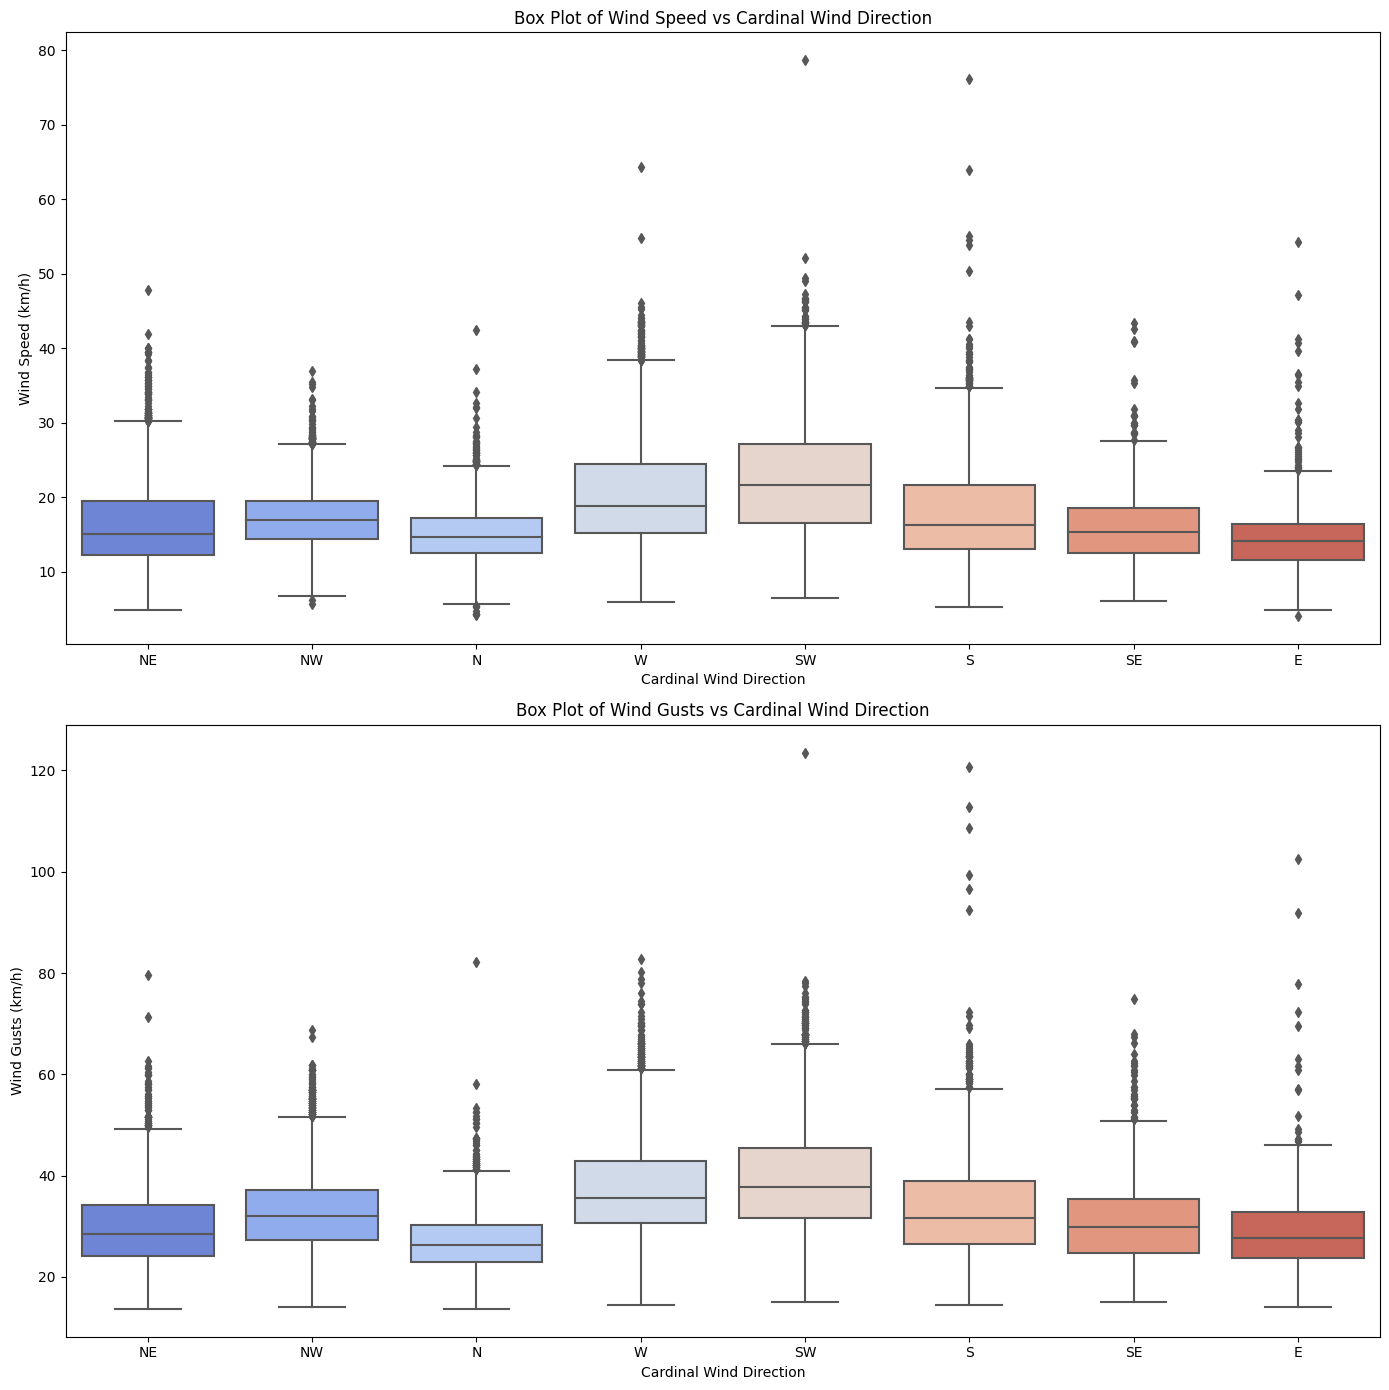

In [46]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

# Box plot for windspeed_10m_max vs cardinal_wind_direction
sns.boxplot(x='cardinal_wind_direction', y='windspeed_10m_max', data=data, ax=ax[0], palette="coolwarm")
ax[0].set_title('Box Plot of Wind Speed vs Cardinal Wind Direction')
ax[0].set_xlabel('Cardinal Wind Direction')
ax[0].set_ylabel('Wind Speed (km/h)')

# Box plot for windgusts_10m_max vs cardinal_wind_direction
sns.boxplot(x='cardinal_wind_direction', y='windgusts_10m_max', data=data, ax=ax[1], palette="coolwarm")
ax[1].set_title('Box Plot of Wind Gusts vs Cardinal Wind Direction')
ax[1].set_xlabel('Cardinal Wind Direction')
ax[1].set_ylabel('Wind Gusts (km/h)')

# Adjust the layout
plt.tight_layout()
plt.show()


In [47]:
# Filtering data for Karachi
karachi_data = data[data['city'] == 'Karachi']

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Box plot for temperature_2m_max vs cardinal_wind_direction
sns.boxplot(x='cardinal_wind_direction', y='temperature_2m_max', data=karachi_data, ax=ax[0], palette="coolwarm")
ax[0].set_title('Box Plot of Max Temperature vs Cardinal Wind Direction in Karachi')
ax[0].set_xlabel('Cardinal Wind Direction')
ax[0].set_ylabel('Max Temperature (°C)')

# Box plot for temperature_2m_min vs cardinal_wind_direction
sns.boxplot(x='cardinal_wind_direction', y='temperature_2m_min', data=karachi_data, ax=ax[1], palette="coolwarm")
ax[1].set_title('Box Plot of Min Temperature vs Cardinal Wind Direction in Karachi')
ax[1].set_xlabel('Cardinal Wind Direction')
ax[1].set_ylabel('Min Temperature (°C)')

# Box plot for temperature_2m_mean vs cardinal_wind_direction
sns.boxplot(x='cardinal_wind_direction', y='temperature_2m_mean', data=karachi_data, ax=ax[2], palette="coolwarm")
ax[2].set_title('Box Plot of Mean Temperature vs Cardinal Wind Direction in Karachi')
ax[2].set_xlabel('Cardinal Wind Direction')
ax[2].set_ylabel('Mean Temperature (°C)')

# Adjust the layout
plt.tight_layout()
plt.show()


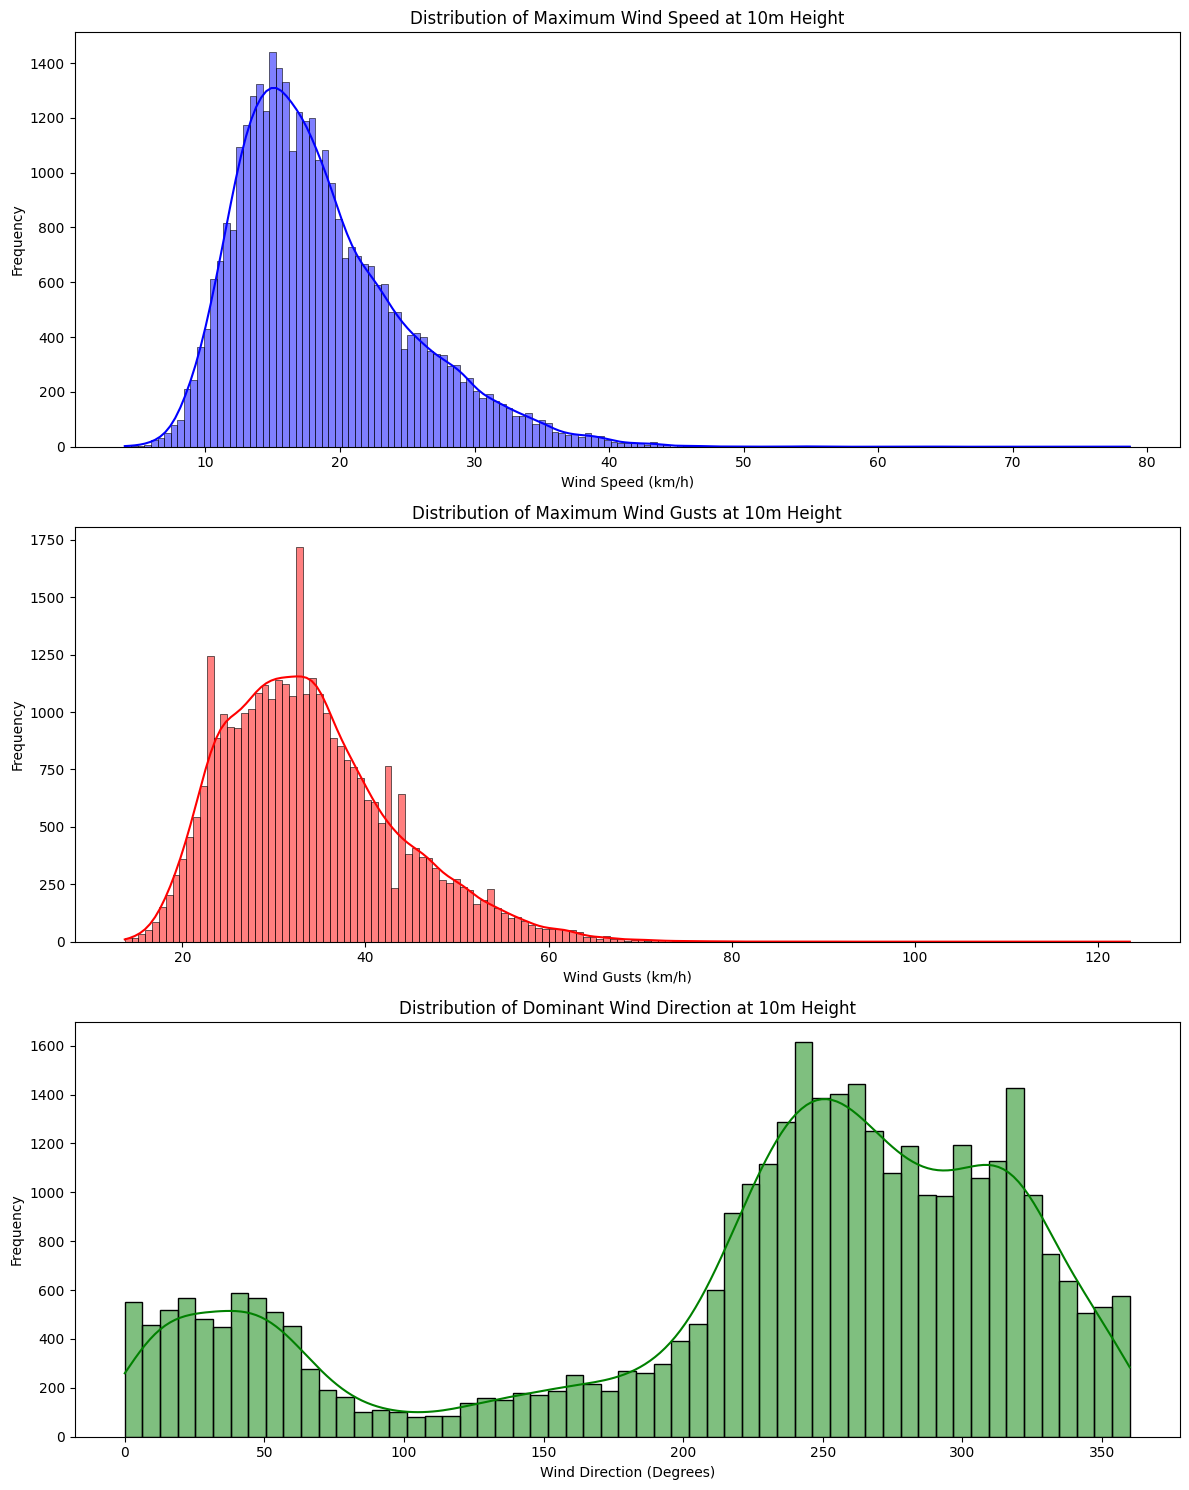

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Windspeed at 10m height (max)
sns.histplot(data=wind_data, x='windspeed_10m_max', kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Maximum Wind Speed at 10m Height')
ax[0].set_xlabel('Wind Speed (km/h)')
ax[0].set_ylabel('Frequency')

# Wind gusts at 10m height (max)
sns.histplot(data=wind_data, x='windgusts_10m_max', kde=True, ax=ax[1], color='red')
ax[1].set_title('Distribution of Maximum Wind Gusts at 10m Height')
ax[1].set_xlabel('Wind Gusts (km/h)')
ax[1].set_ylabel('Frequency')

# Dominant wind direction at 10m height
sns.histplot(data=wind_data, x='winddirection_10m_dominant', kde=True, ax=ax[2], color='green')
ax[2].set_title('Distribution of Dominant Wind Direction at 10m Height')
ax[2].set_xlabel('Wind Direction (Degrees)')
ax[2].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


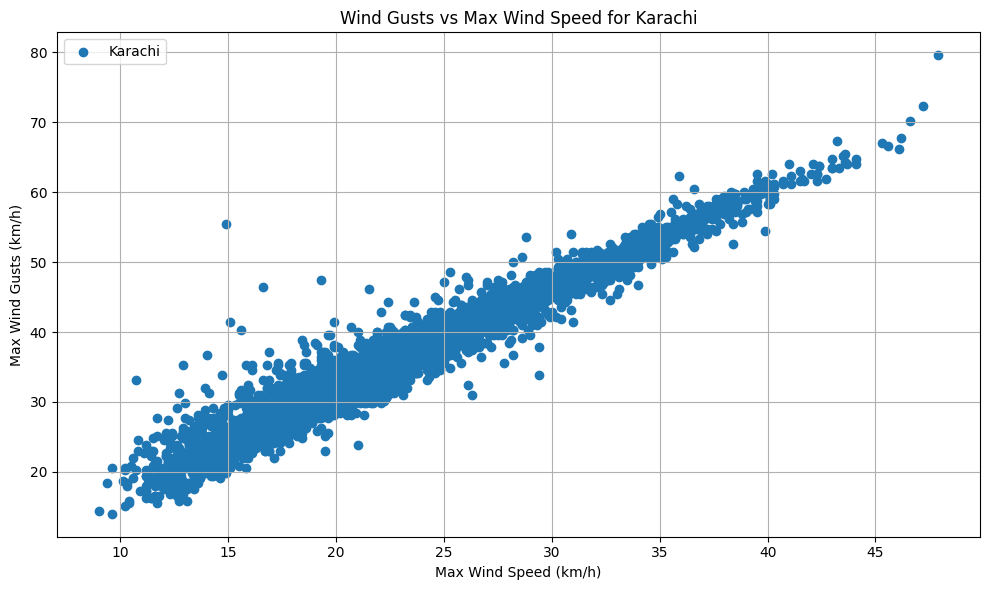

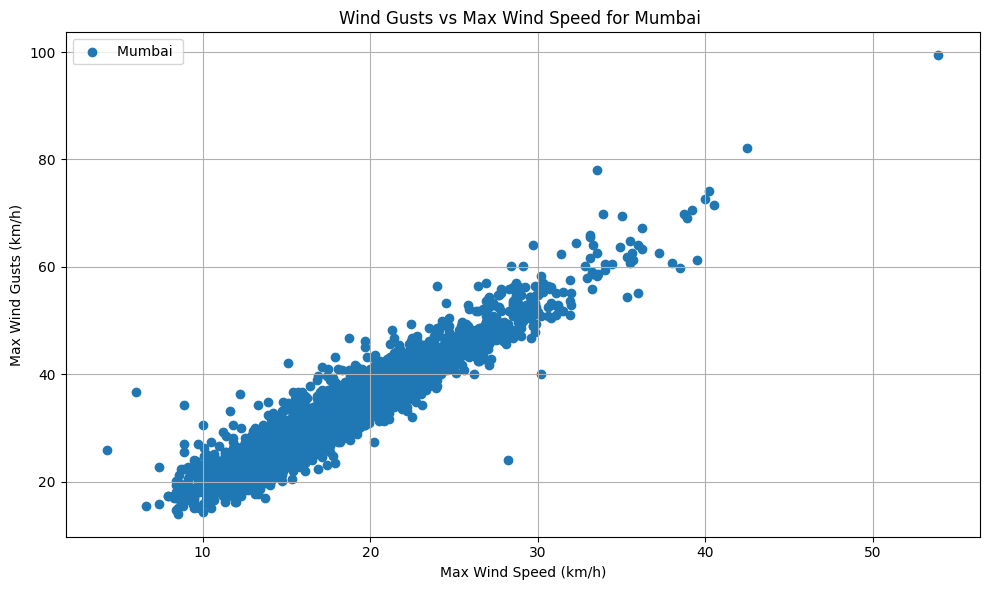

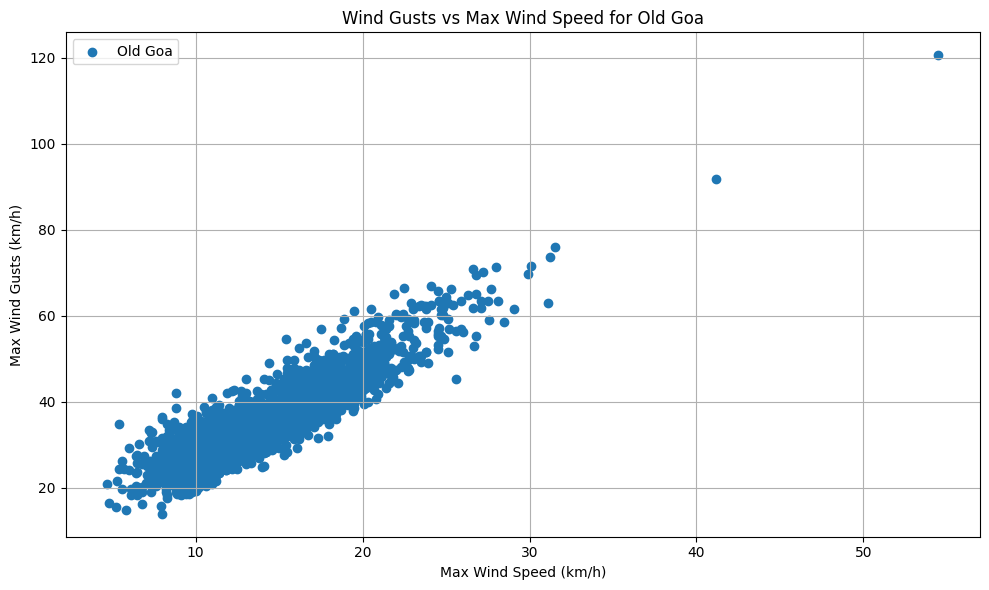

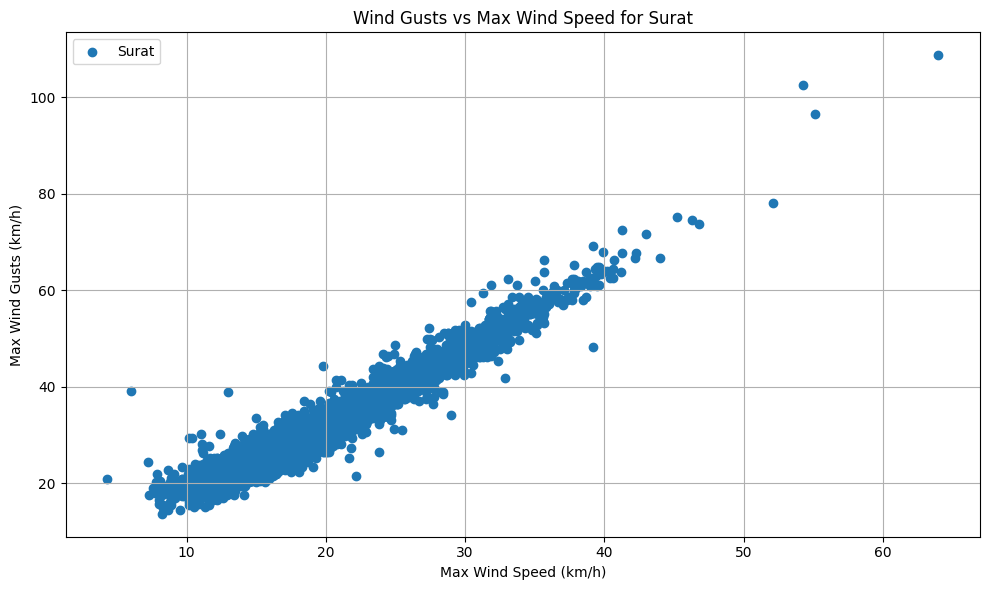

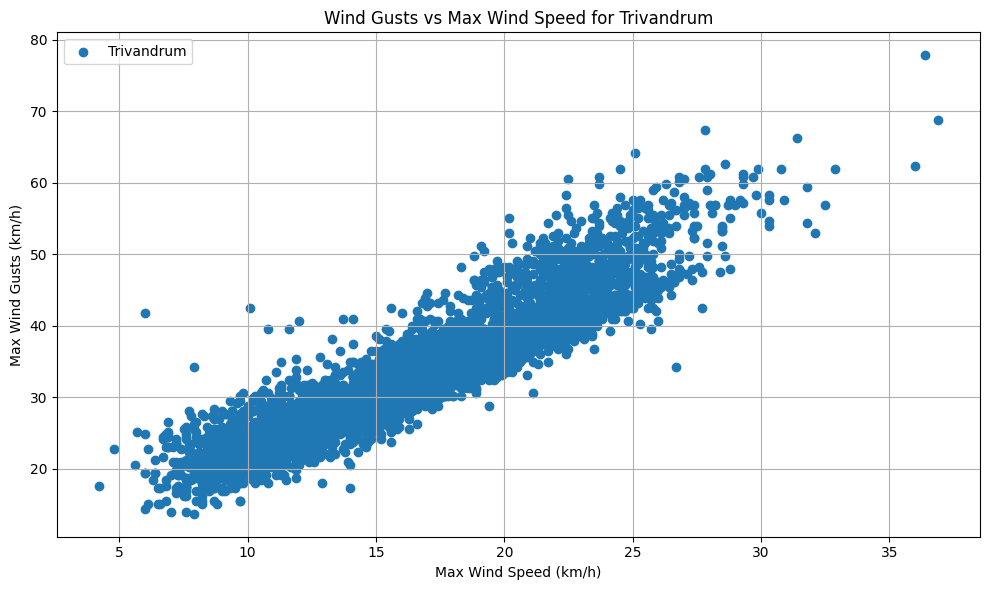

In [9]:
# Plotting the relationship between windspeed_10m_max and windgusts_10m_max for each city
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.scatter(group_data['windspeed_10m_max'], group_data['windgusts_10m_max'], label=city)

    plt.title('Wind Gusts vs Max Wind Speed for %s' % city)
    plt.xlabel('Max Wind Speed (km/h)')
    plt.ylabel('Max Wind Gusts (km/h)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


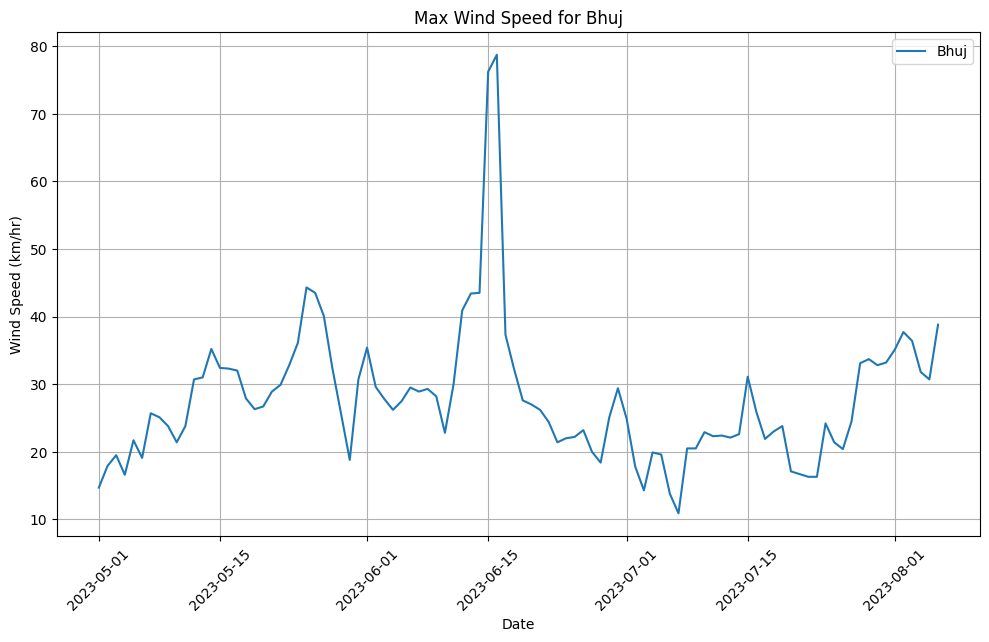

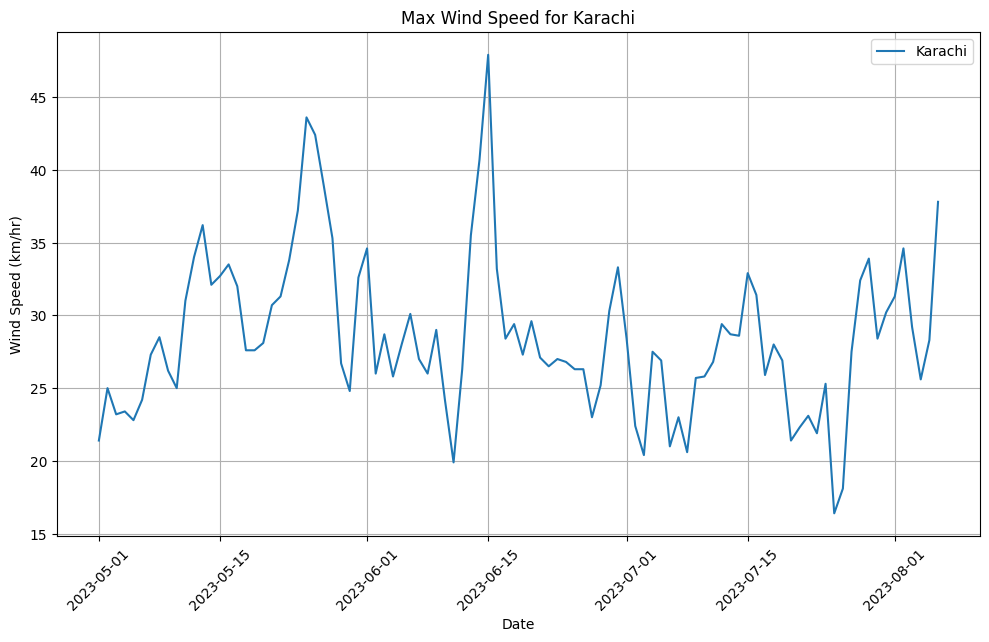

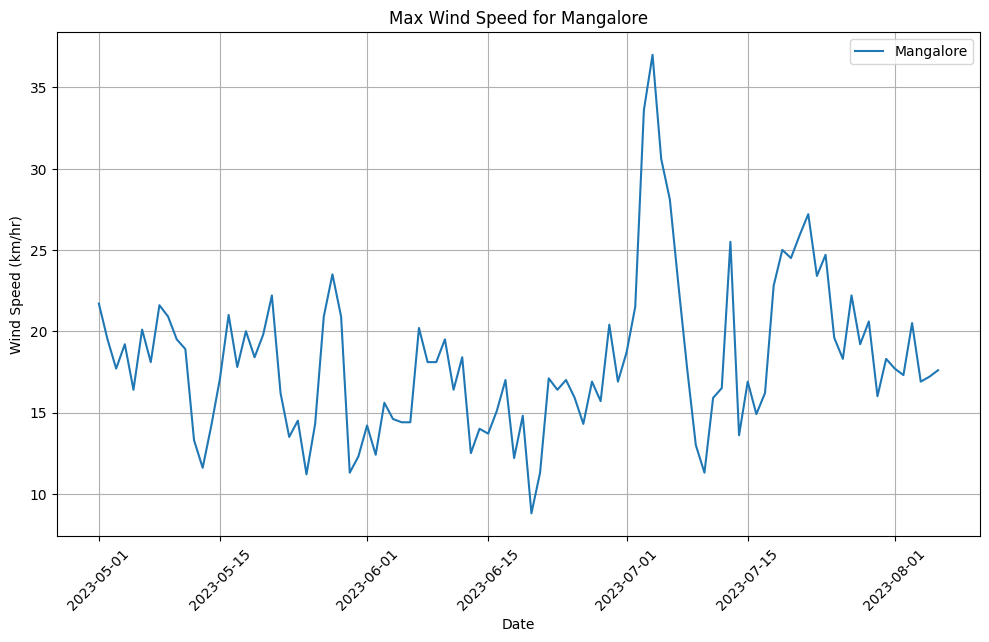

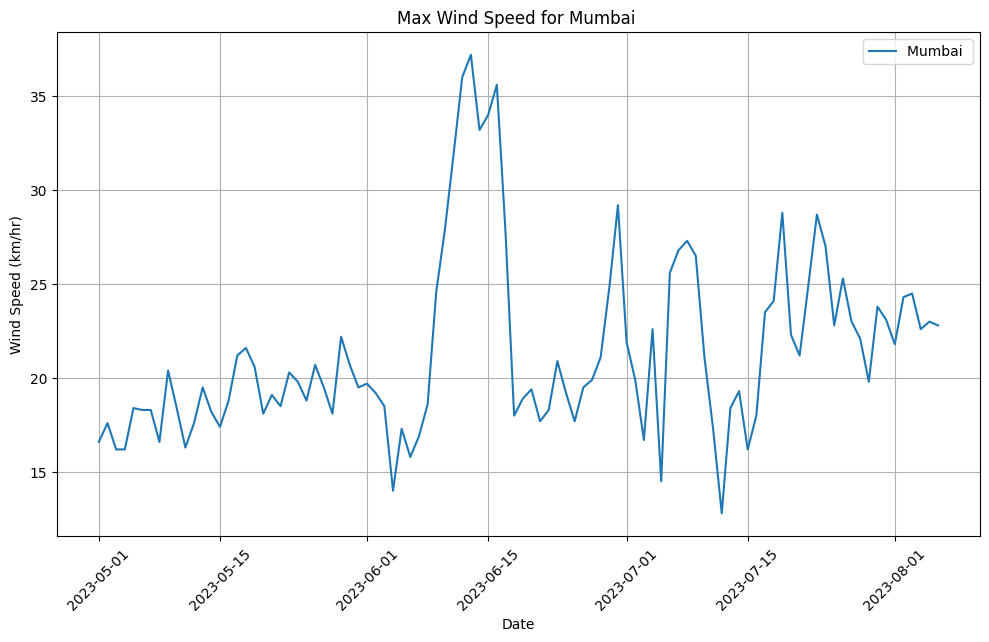

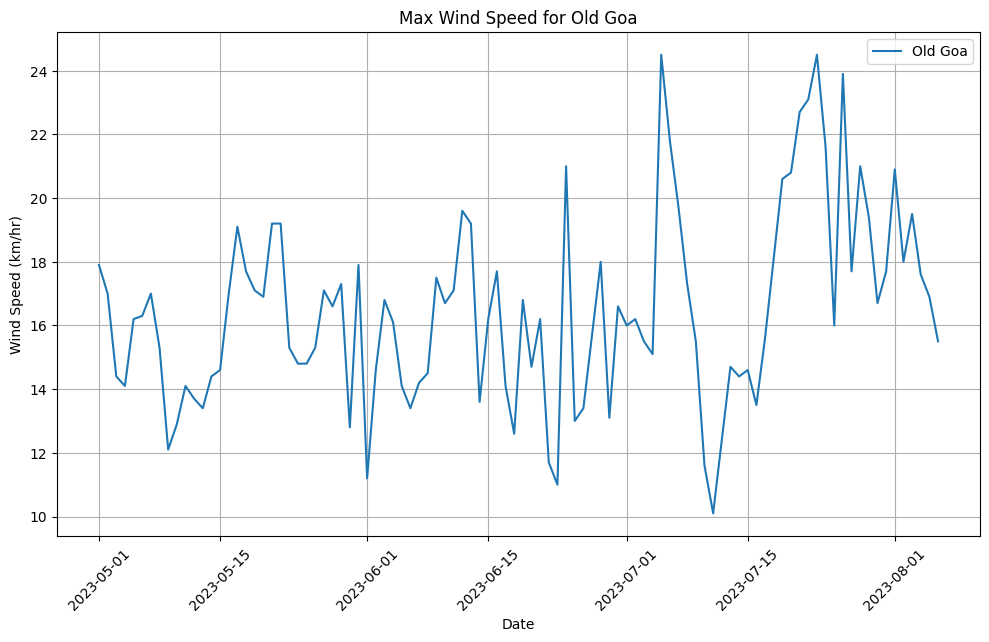

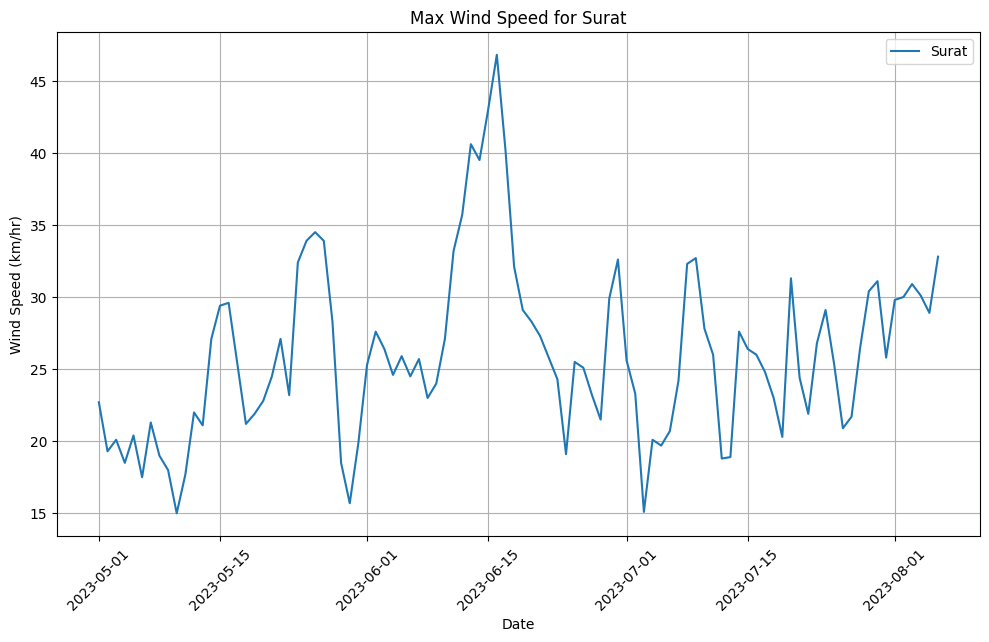

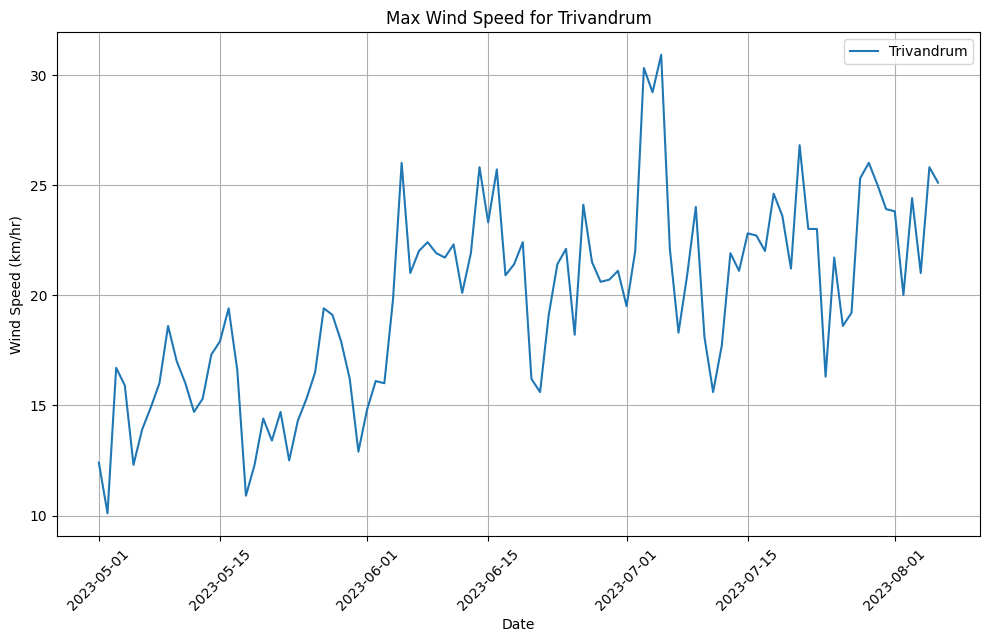

In [15]:
# Correcting the date range
start_date = '2023-05-1'
end_date = '2023-11-1'

# Filtering the data based on the date range
filtered_df = data[(data['time'] >= start_date) & (data['time'] <= end_date)]

# Plotting the maximum wind speed for each city in the filtered date range
for city, group_data in filtered_df.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['time'], group_data['windspeed_10m_max'], label=city)
    plt.title('Max Wind Speed for %s' % city)
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (km/hr)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()


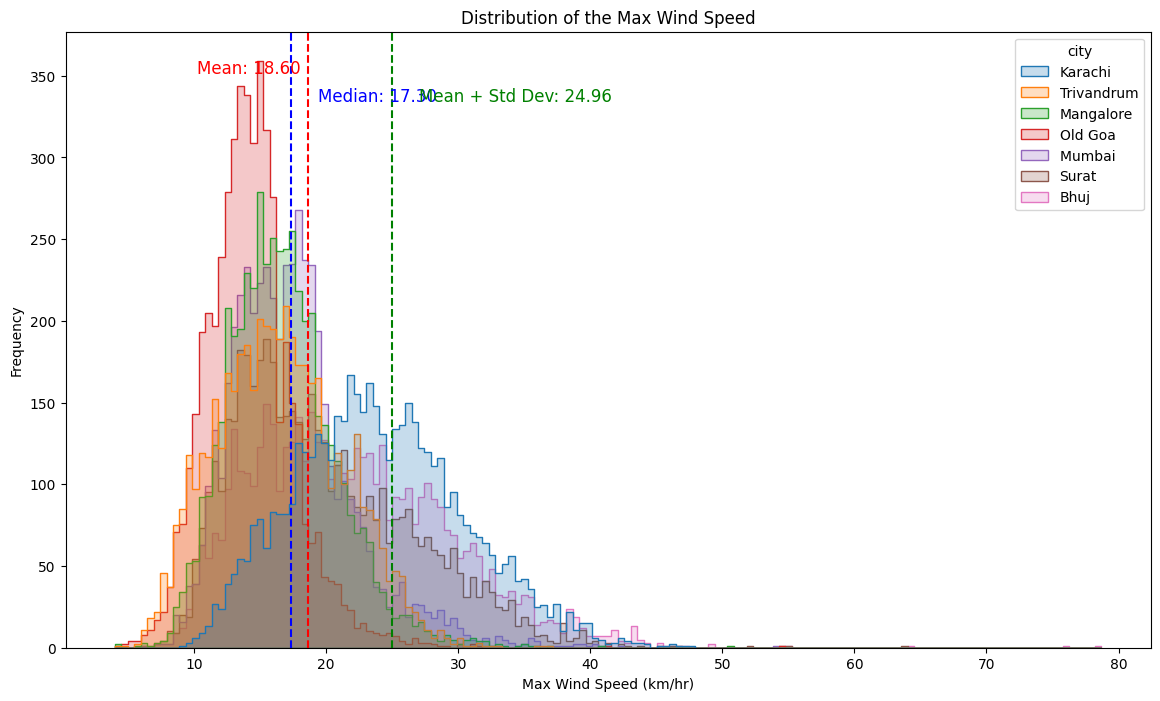

In [18]:
# Show Distribution of the Maximum Wind Speed Values for Different Cities
plt.figure(figsize=(14, 8))
sns.histplot(data=data, x='windspeed_10m_max', hue='city', element='step', common_norm=False)

mean_wind = np.mean(data['windspeed_10m_max'])
median_wind = np.median(data['windspeed_10m_max'])
std_deviation_wind = np.std(data['windspeed_10m_max'])

plt.axvline(mean_wind, color='red', linestyle='--')
plt.axvline(median_wind, color='blue', linestyle='--')
plt.axvline(mean_wind + std_deviation_wind, color='green', linestyle='--')

# annotate mean, median & Standard deviation
plt.annotate(f'Mean: {mean_wind:.2f}', xy=(mean_wind, plt.gca().get_ylim()[1]), xytext=(-80, -30),
             textcoords='offset points', color='red', fontsize=12)
plt.annotate(f'Median: {median_wind:.2f}', xy=(median_wind, plt.gca().get_ylim()[1]), xytext=(20, -50),
             textcoords='offset points', color='blue', fontsize=12)
plt.annotate(f'Mean + Std Dev: {mean_wind + std_deviation_wind:.2f}', xy=(mean_wind + std_deviation_wind, plt.gca().get_ylim()[1]), xytext=(20, -50),
             textcoords='offset points', color='green', fontsize=12)
plt.xlabel('Max Wind Speed (km/hr)')
plt.ylabel('Frequency')
plt.title('Distribution of the Max Wind Speed')
plt.show()


Natural Disasters caused by Wind:

Wind, especially when it reaches high speeds, can be an indicator of certain natural disasters. While wind alone may not predict all types of natural disasters, it is a critical component in forecasting and understanding several weather-related disasters. Here's how wind can be used to predict specific natural disasters:

Tropical Cyclones, Hurricanes, and Typhoons:

These are intense storm systems characterized by strong winds, heavy rainfall, and storm surges.
Sustained high wind speeds, typically above 74 mph (119 km/h), can indicate the presence of a hurricane or typhoon.
Forecasting models use wind data, among other parameters, to predict the path, intensity, and potential landfall of these storms.
Tornadoes:

Tornadoes are localized, rapidly rotating wind columns in contact with the ground and are associated with severe thunderstorms.
Doppler radar can detect specific wind patterns, such as rotation within a storm, which can be an early indicator of tornado formation.
Dust and Sand Storms:

In arid and semi-arid regions, strong winds can pick up loose sand and dust, reducing visibility and affecting respiratory health.
Monitoring wind speeds and directions can help predict the onset and movement of these storms.
Wildfires:

While wind doesn't start wildfires, it plays a significant role in their spread.
High wind speeds can carry embers and cause "spot fires" far from the main fire front, complicating firefighting efforts and making the fire more unpredictable.
Storm Surges:

In coastal areas, strong winds, especially during tropical cyclones, can drive sea water inland, causing flooding.
Predicting wind patterns during cyclonic events can help forecast the severity and extent of storm surges.